**Trabalho Estatística**

# **Importações**

In [1]:
# Passo 1: Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML


# **Ler e importar Excel**

In [4]:

# Passo 2: Carregar dados do Excel
# Você pode usar o seguinte comando para carregar um arquivo do seu Google Drive:
# from google.colab import files
# uploaded = files.upload()  # Isso abrirá uma caixa para você escolher o arquivo Excel
link_excel = 'https://docs.google.com/spreadsheets/d/1wmpM9yLh5ZX7HSnUG3TTDiJsZxhqRzac/export'
# Supondo que o nome do arquivo seja 'data.xlsx', ajuste conforme necessário
df = pd.read_excel(link_excel)

# **Tarefa 1**

In [9]:
# Passo 3: Calcular Tabelas de Frequência

def calcular_frequencias_salario(df):
    """Calcula a tabela de frequências para a variável salário com intervalos arredondados e 3 casas decimais"""

    # Remover valores negativos
    df['salary'] = df['salary'].abs()

    # Criar DataFrame
    df = pd.DataFrame(df['salary'], columns=['salary'])

    # Definir o número de intervalos usando a regra de Sturges
    n = len(df)  # Número total de observações
    num_intervals = int(1 + 3.322 * np.log10(n))  # Regra de Sturges

    # Gerar intervalos automaticamente, garantindo que o mínimo seja zero
    min_salary = df['salary'].min()
    max_salary = df['salary'].max()

    # Criar os bins para os intervalos
    bins = pd.interval_range(start=min_salary, end=max_salary, periods=num_intervals)

    # Atribuir intervalos aos salários
    df['interval'] = pd.cut(df['salary'], bins=bins, include_lowest=True)

    # Calcular frequência dos intervalos
    salary_freq = df['interval'].value_counts().sort_index()

    # Frequência absoluta (fi)
    fi = salary_freq.values

    # Frequência percentual (fi%)
    fi_percent = np.round((fi / n) * 100, 3)

    # Frequência acumulada (Fi)
    Fi = np.cumsum(fi)

    # Frequência acumulada percentual (Fi%)
    Fi_percent = np.round(np.cumsum(fi_percent), 3)

    # Ponto médio (Xi)
    Xi = salary_freq.index.map(lambda x: np.round((x.left + x.right) / 2, 3))

    # Formatar os intervalos para não ter casas decimais
    formatted_intervals = salary_freq.index.map(lambda x: f"({int(x.left)}, {int(x.right)}]")

    # Gerar DataFrame de frequência com intervalos formatados e valores arredondados
    salary_freq_df = pd.DataFrame({
        'Faixa de Salário (USD)': formatted_intervals,
        'Ponto Médio (Xi)': Xi,
        'Frequência (fi)': fi,
        'Frequência % (fi%)': fi_percent,
        'Frequência Acumulada (Fi)': Fi,
        'Frequência Acumulada % (Fi%)': Fi_percent
    })

    # Gerar dicionário para uso no template HTML
    salary_freq_dict = salary_freq_df.set_index('Faixa de Salário (USD)').to_dict()

    return salary_freq_df, salary_freq_dict

# Calcular a tabela de frequência de salários
salario_freq_df, salario_freq_dict = calcular_frequencias_salario(df)
print("Tabela de Frequência do Salário:")
display(HTML(salario_freq_df.to_html(index=False, border=0)))

Tabela de Frequência do Salário:


Faixa de Salário (USD),Ponto Médio (Xi),Frequência (fi),Frequência % (fi%),Frequência Acumulada (Fi),Frequência Acumulada % (Fi%)
"(14000, 2039733]",1026866.667,16494,99.758,16494,99.758
"(2039733, 4065466]",3052600.000,23,0.139,16517,99.897
"(4065466, 6091200]",5078333.333,8,0.048,16525,99.945
"(6091200, 8116933]",7104066.667,4,0.024,16529,99.969
"(8116933, 10142666]",9129800.000,1,0.006,16530,99.975
"(10142666, 12168400]",11155533.333,2,0.012,16532,99.987
"(12168400, 14194133]",13181266.667,0,0.000,16532,99.987
"(14194133, 16219866]",15207000.000,0,0.000,16532,99.987
"(16219866, 18245600]",17232733.333,0,0.000,16532,99.987
"(18245600, 20271333]",19258466.667,0,0.000,16532,99.987


# **Tarefa 2**

In [21]:
def calcular_frequencias_job_title(df):
    """Calcula a tabela de frequências para a variável job_title."""

    # Calcular a frequência de títulos de trabalho
    job_title_freq = df['job_title'].value_counts().reset_index()
    job_title_freq.columns = ['Título do Trabalho', 'Frequência']

    # Total de observações
    total = job_title_freq['Frequência'].sum()

    # Frequência percentual (fi%)
    job_title_freq['Frequência % (fi%)'] = np.round((job_title_freq['Frequência'] / total) * 100, 3)

    # Frequência acumulada (Fi)
    job_title_freq['Frequência Acumulada (Fi)'] = job_title_freq['Frequência'].cumsum()

    # Frequência acumulada percentual (Fi%)
    job_title_freq['Frequência Acumulada % (Fi%)'] = np.round(job_title_freq['Frequência % (fi%)'].cumsum(), 3)

    # Ponto médio (Xi) - usaremos o índice ordinal como ponto médio
    job_title_freq['Ponto Médio (Xi)'] = np.round(range(1, len(job_title_freq) + 1), 3)

    # Reorganizar as colunas para que o ponto médio fique logo após o título do trabalho
    job_title_freq = job_title_freq[['Título do Trabalho', 'Ponto Médio (Xi)', 'Frequência', 'Frequência % (fi%)', 'Frequência Acumulada (Fi)', 'Frequência Acumulada % (Fi%)']]

    return job_title_freq

# Calcular a tabela de frequência por título de trabalho
job_title_freq = calcular_frequencias_job_title(df)
print("\nTabela de Frequência do Título do Trabalho:")
display(HTML(job_title_freq.to_html(index=False, border=0)))


Tabela de Frequência do Título do Trabalho:


Título do Trabalho,Ponto Médio (Xi),Frequência,Frequência % (fi%),Frequência Acumulada (Fi),Frequência Acumulada % (Fi%)
Data Engineer,1,3464,20.951,3464,20.951
Data Scientist,2,3314,20.044,6778,40.995
Data Analyst,3,2440,14.757,9218,55.752
Machine Learning Engineer,4,1705,10.312,10923,66.064
Research Scientist,5,531,3.212,11454,69.276
Applied Scientist,6,435,2.631,11889,71.907
Data Architect,7,435,2.631,12324,74.538
Analytics Engineer,8,431,2.607,12755,77.145
Research Engineer,9,306,1.851,13061,78.996
Data Science,10,271,1.639,13332,80.635


# **Tarefa 3**

## Gráfico nível de experiência

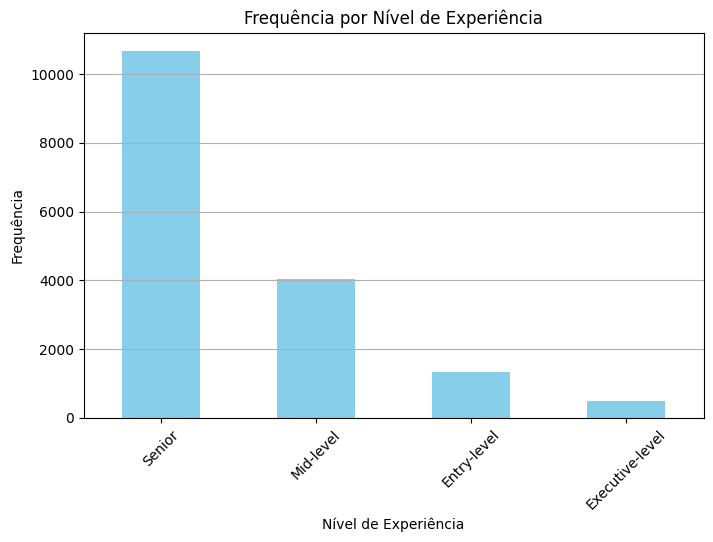

In [12]:
def plot_experience_level(df):
    """Plota a frequência por nível de experiência"""
    experience_freq = df['experience_level'].value_counts()
    plt.figure(figsize=(8, 5))
    experience_freq.plot(kind='bar', color='skyblue')
    plt.title('Frequência por Nível de Experiência')
    plt.xlabel('Nível de Experiência')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
plot_experience_level(df)

## Gráfico salário em USD



In [ ]:

def plot_salary(df):
    """Plota a distribuição do salário em USD"""
    plt.figure(figsize=(8, 5))
    plt.hist(df['salary'], bins=30, color='lightgreen', edgecolor='black')
    plt.title('Distribuição do Salário em USD')
    plt.xlabel('Salário (USD)')
    plt.ylabel('Frequência')
    plt.grid(axis='y')
    plt.show()
plot_salary(df)

## Gráfico porcentagem de trabalho remoto

In [ ]:

def plot_remote_ratio(df):
    """Plota a frequência por porcentagem de trabalho remoto"""
    remote_freq = df['remote_ratio'].value_counts()
    plt.figure(figsize=(8, 5))
    remote_freq.plot(kind='bar', color='salmon')
    plt.title('Frequência por Porcentagem de Trabalho Remoto')
    plt.xlabel('Porcentagem de Trabalho Remoto')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
plot_remote_ratio(df)

## Gráfico tamanho da empresa

In [ ]:
def plot_company_size(df):
    """Plota a frequência por tamanho da empresa"""
    company_size_freq = df['company_size'].value_counts()
    plt.figure(figsize=(8, 5))
    company_size_freq.plot(kind='bar', color='lightcoral')
    plt.title('Frequência por Tamanho da Empresa')
    plt.xlabel('Tamanho da Empresa')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
plot_company_size(df)